<a href="https://colab.research.google.com/github/catastropiyush/course_notes/blob/main/Numerical_methods_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install smplotlib
import smplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 424.1/424.1 kB 5.8 MB/s eta 0:00:00


Text(0, 0.5, '$y$')

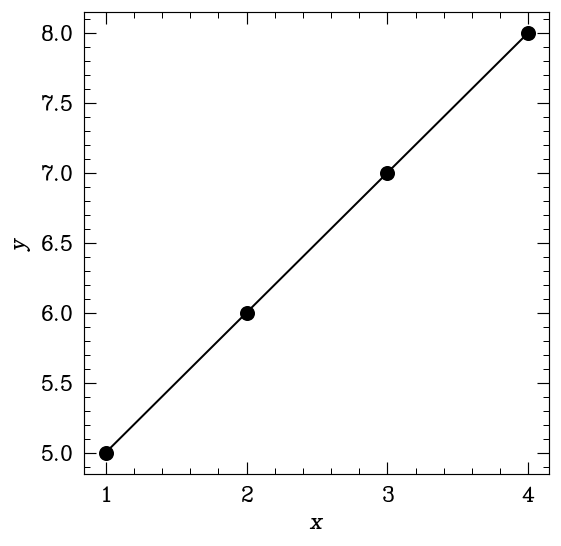

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))
plt.plot([1, 2, 3, 4], [5, 6, 7, 8],marker='o')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

h= 0.2


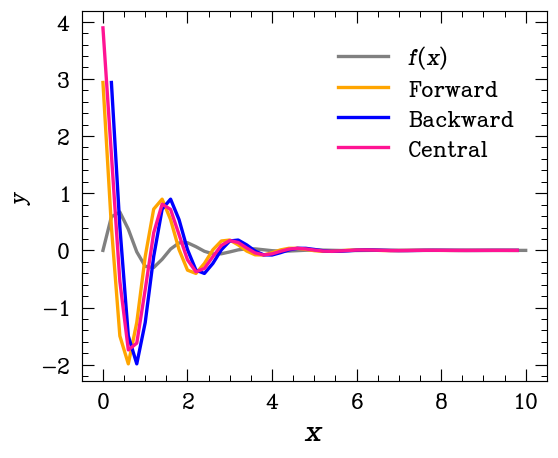

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x=[] ; y=[]
lower=0 ; upper=10; step=0.2
N=int(((upper-lower)/step))
dy = [0]*N ; back=[0]*N ; forw=[0]*N

def f(x):
  return np.sin(4*x)*np.exp(-x)
for i in range(0,N+1):
  x_step = lower+i*step
  x.append(x_step)
  y.append(f(x[i]))

for i in range(1,N-1):
  dy[i]=(y[i+1] - y[i-1]) / (x[i+1] - x[i-1])  #central difference formula
for i in range(1,N):
  back[i]=(y[i] - y[i-1]) / (x[i] - x[i-1])    #backward difference
for i in range(0,N):
  forw[i]=(y[i+1] - y[i]) / (x[i+1] - x[i])    #forward difference


dy[0] = dy[1] + (dy[2]-dy[1])/(x[2]-x[1])*(x[0]-x[1])
dy[N-1] = dy[N-2] + (dy[N-2]-dy[N-3])/(x[N-2]-x[N-3])*(x[N-1]-x[N-2])

plt.figure(figsize=(5,4))
print('h=',step)
plt.plot(x,y,color='grey',linewidth=2.0,label=r'$f(x)$')
plt.plot(x[:-1],forw,color='orange',linewidth=2.0,label='Forward')
plt.plot(x[1:-1],back[1:],color='blue',linewidth=2.0,label='Backward')
plt.plot(x[:-1],dy,color='deeppink',linewidth=2.0,label='Central')
plt.xlabel('$x$',fontsize=20)
plt.ylabel('$y$')
plt.legend(loc='upper right')

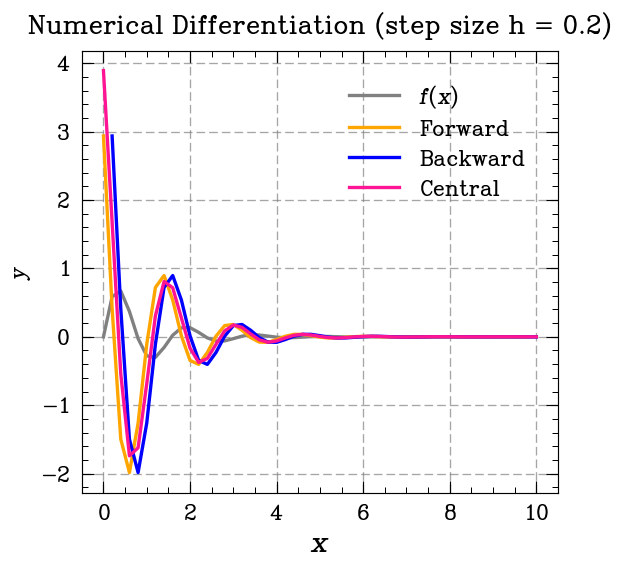

Step size h = 0.2


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.sin(4 * x) * np.exp(-x)

def optimize_numerical_differentiation(lower=0, upper=10, step=0.2):
    x = np.arange(lower, upper + step, step)
    y = f(x)

    # Calculate derivatives
    forw = np.diff(y) / np.diff(x)
    back = forw  # Same as forward, just shifted
    central = (y[2:] - y[:-2]) / (x[2:] - x[:-2])

    # Extrapolate for central difference at endpoints
    dy = np.zeros_like(y)
    dy[1:-1] = central
    dy[0] = central[0] + (central[1] - central[0]) / (x[2] - x[1]) * (x[0] - x[1])
    dy[-1] = central[-1] + (central[-1] - central[-2]) / (x[-2] - x[-3]) * (x[-1] - x[-2])

    # Plotting
    plt.figure(figsize=(5, 5))
    plt.plot(x, y, color='grey', linewidth=2.0, label=r'$f(x)$')
    plt.plot(x[:-1], forw, color='orange', linewidth=2.0, label='Forward')
    plt.plot(x[1:], back, color='blue', linewidth=2.0, label='Backward')
    plt.plot(x, dy, color='deeppink', linewidth=2.0, label='Central')
    plt.xlabel('$x$', fontsize=20)
    plt.ylabel('$y$')
    plt.legend(loc='upper right')
    plt.title(f'Numerical Differentiation (step size h = {step})')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    print(f'Step size h = {step}')

optimize_numerical_differentiation()

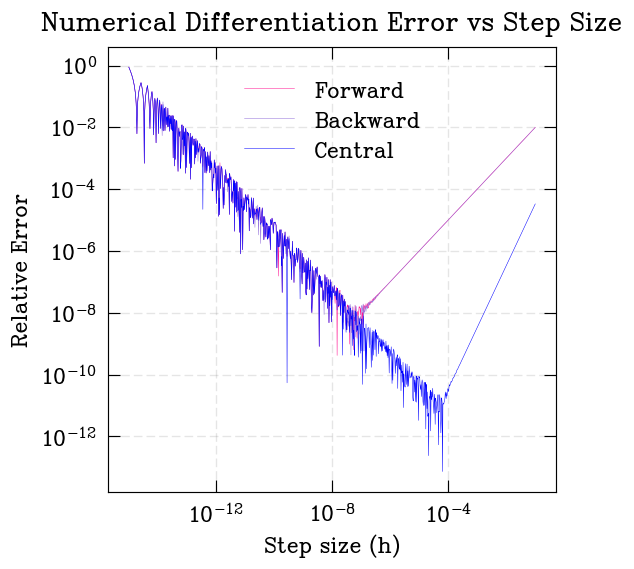

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**3

def fprime(x):
    return 3 * x**2

def numerical_diff(x, h, method):
    if method == 'forward':
        return (f(x + h) - f(x)) / h
    elif method == 'backward':
        return (f(x) - f(x - h)) / h
    elif method == 'central':
        return (f(x + h) - f(x - h)) / (2 * h)
    else:
        raise ValueError("Invalid method. Choose 'forward', 'backward', or 'central'.")

def compute_errors(x, hs, methods):
    """Compute relative errors for given methods"""
    ans = fprime(x)
    errors = {}
    for method in methods:
        numerical_results = numerical_diff(x, hs, method)
        errors[method] = np.abs(numerical_results - ans) / ans
    return errors

def plot_errors(hs, errors, methods):
    plt.figure(figsize=(5,5))
    colors = {'forward': 'deeppink', 'backward': 'mediumpurple', 'central': 'blue'}

    for method in methods:
        plt.loglog(hs, errors[method], color=colors[method], linewidth=0.3, label=method.capitalize())

    plt.grid(alpha=0.2, linestyle='--')
    plt.legend(frameon=False)
    plt.xlabel('Step size (h)')
    plt.ylabel('Relative Error')
    plt.title('Numerical Differentiation Error vs Step Size')
    plt.tight_layout()
    plt.show()

def main():
    x = 10.0
    hs = np.logspace(-15, -1, 1000)
    methods = ['forward', 'backward', 'central']

    errors = compute_errors(x, hs, methods)
    plot_errors(hs, errors, methods)

if __name__ == "__main__":
    main()

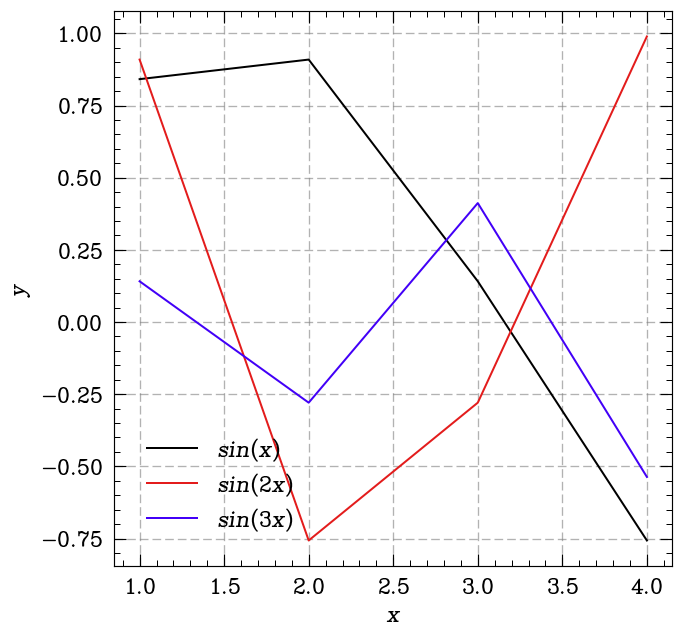

In [ ]:
#x = np.linspace(0, 2*np.pi, 100)
x = np.array([1, 2, 3, 4]) # convert x to a NumPy array
y1 = np.sin(x)
y2 = np.sin(2*x)
y3 = np.sin(3*x)

plt.plot(x, y1, label=r'$sin(x)$')
plt.plot(x, y2, label=r'$sin(2x)$')
plt.plot(x, y3, label=r'$sin(3x)$')

plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.legend()
plt.grid(True)

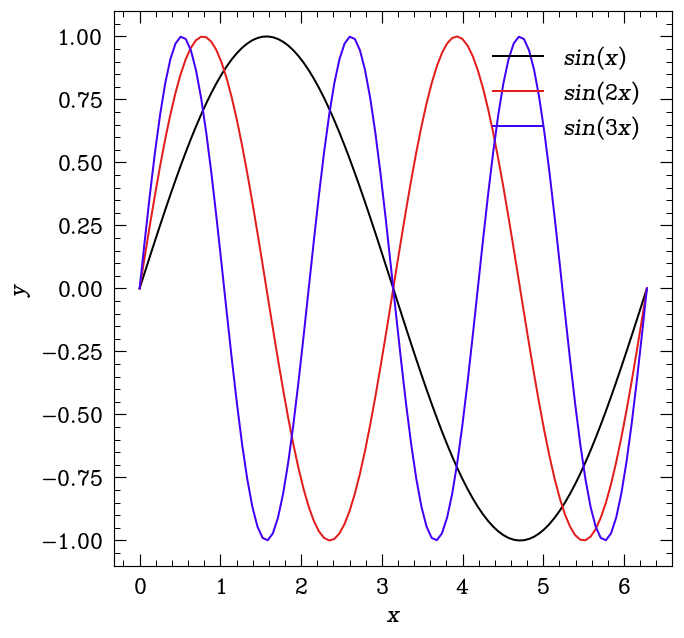

In [ ]:
x = np.linspace(0, 2*np.pi, 100)
#x = np.array([1, 2, 3, 4]) # convert x to a NumPy array
y1 = np.sin(x)
y2 = np.sin(2*x)
y3 = np.sin(3*x)

plt.plot(x, y1, label=r'$sin(x)$')
plt.plot(x, y2, label=r'$sin(2x)$')
plt.plot(x, y3, label=r'$sin(3x)$')

plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.legend()

#Root finding

-1.3
-2.6057971014492756
-2.0947917737398534
-1.907089621108938
-1.8799376384646134
root = -1.8793854679155002


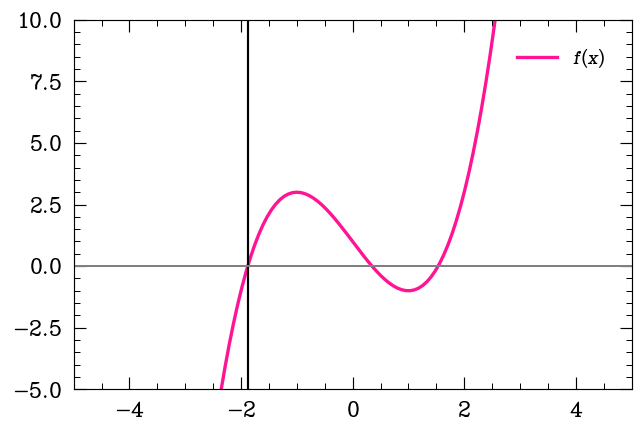

In [4]:
import numpy as np
import matplotlib.pyplot as plt

x=np.linspace(-5,10,200)

def f(x):     #function
  return x**3-3*x+1
def f_prime(x):   #first derivative
  return 3*x**2-3
def newtoroot(f, df, x0, tol):  #newton raphson method
    if abs(f(x0)) < tol:
        return x0
    else:
        print(x0)
        return newtoroot(f, df, x0 - f(x0)/df(x0), tol)

result = newtoroot(f,f_prime, -1.3, 1e-5) #broo nikal root nikaal
print("root =", result)
plt.figure(figsize=(6,4));plt.xlim([-5,5]);plt.ylim([-5,10])
plt.plot(x,f(x),label=r'$f(x)$',linewidth=2.0,color='deeppink')
plt.axvline(x=result,color='black',linewidth=1.3);plt.axhline(y=0,color='grey')
plt.legend(fontsize='12')

In [5]:
from sympy import symbols, solve

x = symbols('x')
equation = x**3 - 3*x + 1
solutions = solve(equation, x)
print(solutions)

[-3/((-1/2 - sqrt(3)*I/2)*(27/2 + 27*sqrt(3)*I/2)**(1/3)) - (-1/2 - sqrt(3)*I/2)*(27/2 + 27*sqrt(3)*I/2)**(1/3)/3, -(-1/2 + sqrt(3)*I/2)*(27/2 + 27*sqrt(3)*I/2)**(1/3)/3 - 3/((-1/2 + sqrt(3)*I/2)*(27/2 + 27*sqrt(3)*I/2)**(1/3)), -(27/2 + 27*sqrt(3)*I/2)**(1/3)/3 - 3/(27/2 + 27*sqrt(3)*I/2)**(1/3)]


Root = -1.879385


(-5.0, 10.0)

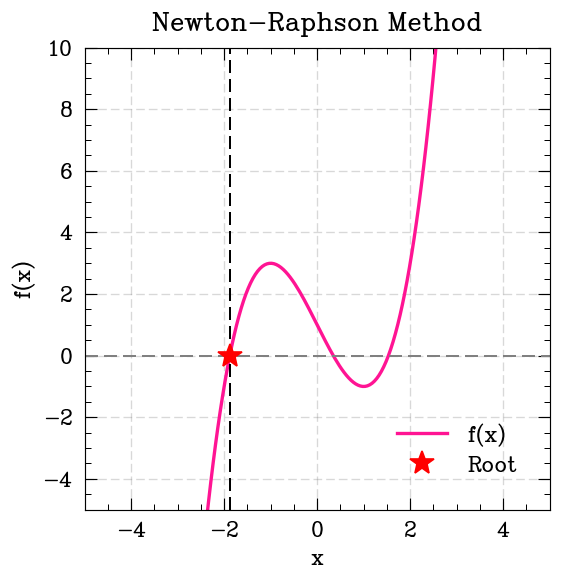

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**3 - 3*x + 1

def f_prime(x):
    return 3*x**2 - 3

def newtoroot(f, df, x0, tol=1e-5, max_iter=100):
    for _ in range(max_iter):
        if abs(f(x0)) < tol:
            return x0
        x0 = x0 - f(x0) / df(x0)
    raise ValueError("Method did not converge")

x0 = -1.3
root = newtoroot(f, f_prime, x0)
print(f"Root = {root:.6f}")

x = np.linspace(-5, 5, 200)
y = f(x)

plt.figure(figsize=(5,5))
plt.plot(x, y, label='f(x)', color='deeppink', linewidth=2)
plt.axhline(y=0, color='grey', linestyle='--')
plt.axvline(x=root, color='black', linestyle='--')
plt.plot(root, 0, 'r*', markersize=15, label='Root')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Newton-Raphson Method')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(-5, 5)
plt.ylim(-5, 10)

Starting point: -1.3, Root = -1.879385
Starting point: 0.5, Root = 0.347296
Starting point: 2.0, Root = 1.532089


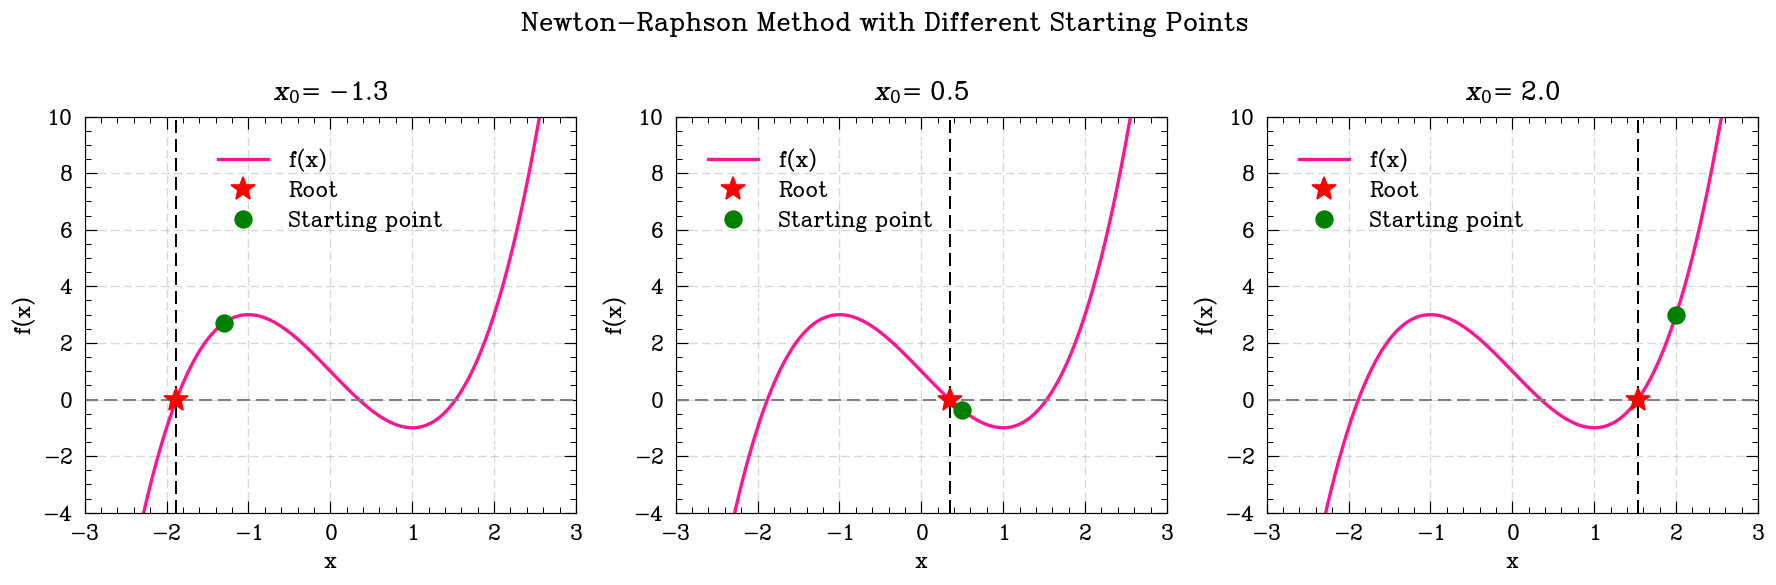

In [11]:
def f(x):
    return x**3 - 3*x + 1

def f_prime(x):
    return 3*x**2 - 3

def newtoroot(f, df, x0, tol=1e-5, max_iter=100):
    for _ in range(max_iter):
        if abs(f(x0)) < tol:
            return x0
        x0 = x0 - f(x0) / df(x0)
    raise ValueError("Method did not converge")

starting_points = [-1.3, 0.5, 2.0]

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Newton-Raphson Method with Different Starting Points')

x = np.linspace(-5, 5, 400)
y = f(x)

for i, x0 in enumerate(starting_points):
    try:
        root = newtoroot(f, f_prime, x0)
        print(f"Starting point: {x0:.1f}, Root = {root:.6f}")

        axs[i].plot(x, y, label='f(x)', color='deeppink', linewidth=2)
        axs[i].axhline(y=0, color='grey', linestyle='--')
        axs[i].axvline(x=root, color='black', linestyle='--')
        axs[i].plot(root, 0, 'r*', markersize=15, label='Root')
        axs[i].plot(x0, f(x0), 'go', markersize=10, label='Starting point')

        axs[i].set_xlabel('x')
        axs[i].set_ylabel('f(x)')
        axs[i].set_title(f'$x_{0}$= {x0:.1f}')
        axs[i].legend()
        axs[i].grid(True, alpha=0.3)
        axs[i].set_xlim(-3, 3)
        axs[i].set_ylim(-4, 10)
    except ValueError as e:
        print(f"Starting point: {x0:.1f}, Error: {str(e)}")
        axs[i].text(0.5, 0.5, f"Method did not converge\nStarting point: {x0:.1f}",
                    ha='center', va='center', transform=axs[i].transAxes)

plt.tight_layout()
plt.show()

Root = -1.879385
Step 1: x = -1.300000, f(x) = 2.703000
Step 2: x = -2.605797, f(x) = -8.876436
Step 3: x = -2.094792, f(x) = -1.907891
Step 4: x = -1.907090, f(x) = -0.214799
Step 5: x = -1.879938, f(x) = -0.004198
Step 6: x = -1.879385, f(x) = -0.000002


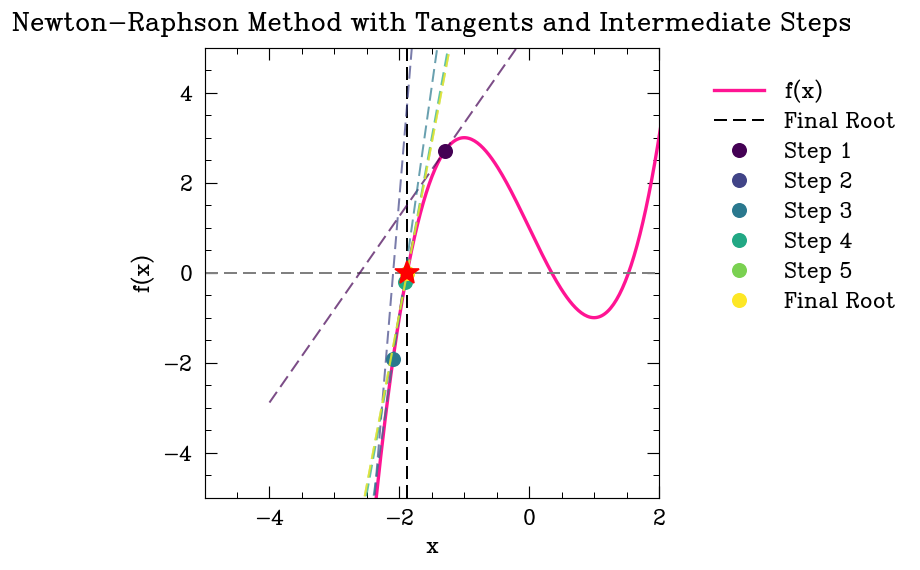

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**3 - 3*x + 1

def f_prime(x):
    return 3*x**2 - 3

def newtoroot(f, df, x0, tol=1e-5, max_iter=100):
    steps = [x0]
    for _ in range(max_iter):
        if abs(f(x0)) < tol:
            return x0, steps
        x0 = x0 - f(x0) / df(x0)
        steps.append(x0)
    raise ValueError("Method did not converge")

x0 = -1.3
root, steps = newtoroot(f, f_prime, x0)
print(f"Root = {root:.6f}")

x = np.linspace(-4, 5, 400)
y = f(x)

plt.figure(figsize=(7, 5))
plt.plot(x, y, label='f(x)', color='deeppink', linewidth=2)
plt.axhline(y=0, color='grey', linestyle='--')
plt.axvline(x=root, color='black', linestyle='--', label='Final Root')

colors = plt.cm.viridis(np.linspace(0, 1, len(steps)))
for i, (x_i, color) in enumerate(zip(steps, colors)):
    y_i = f(x_i)
    plt.plot(x_i, y_i, 'o', color=color, markersize=8, label=f'Step {i+1}' if i < len(steps)-1 else 'Final Root')

    tangent = f_prime(x_i) * (x - x_i) + y_i
    plt.plot(x, tangent, '--', color=color, alpha=0.7)

plt.plot(root, 0, 'r*', markersize=15)

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Newton-Raphson Method with Tangents and Intermediate Steps')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlim(-5, 2)
plt.ylim(-5, 5)

plt.tight_layout()

for i, step in enumerate(steps):
    print(f"Step {i+1}: x = {step:.6f}, f(x) = {f(step):.6f}")

Root = 1.521380
Number of iterations: 7


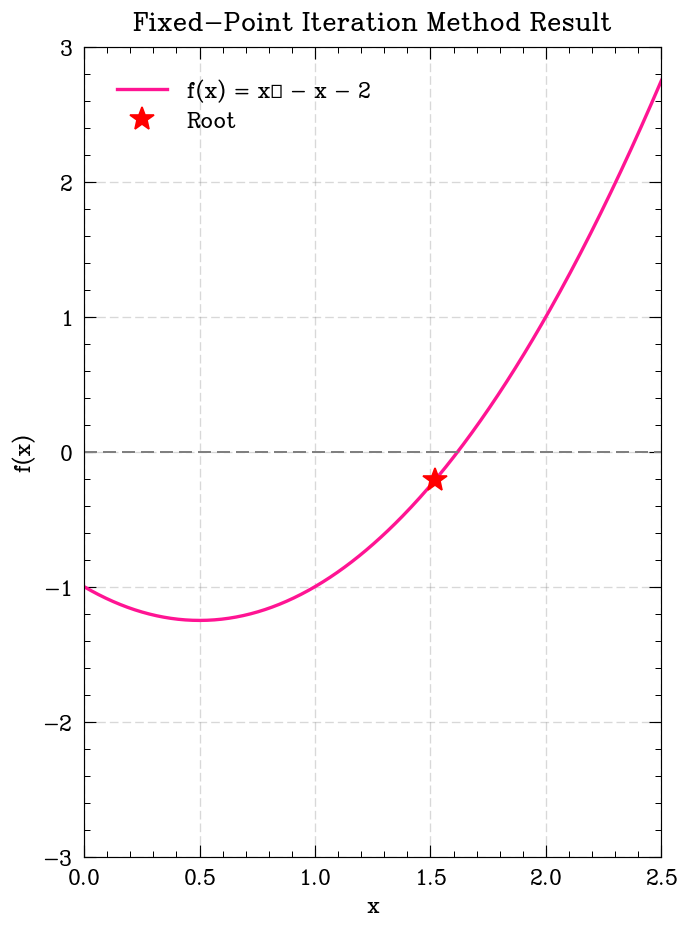

In [45]:
def f(x):
    return x**2 - x - 1

def g(x):
    return (x + 2)**(1/3)

def fixed_point_iteration(g, x0, tol=1e-6, max_iter=100):
    for i in range(max_iter):
        x1 = g(x0)
        if abs(x1 - x0) < tol:
            return x1, i + 1
        x0 = x1
    raise ValueError("Method did not converge")

# Find the fixed point
x0 = 1.5
root, iterations = fixed_point_iteration(g, x0)

print(f"Root = {root:.6f}")
print(f"Number of iterations: {iterations}")

# Plotting
x = np.linspace(0, 2.5, 400)
y_f = f(x)

plt.figure(figsize=(6,8))
plt.plot(x, y_f, label='f(x) = x³ - x - 2', color='deeppink', linewidth=2)
plt.axhline(y=0, color='grey', linestyle='--')
plt.plot(root, f(root), 'r*', markersize=15, label='Root')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Fixed-Point Iteration Method Result')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(0, 2.5)
plt.ylim(-3, 3)

plt.tight_layout()
plt.show()

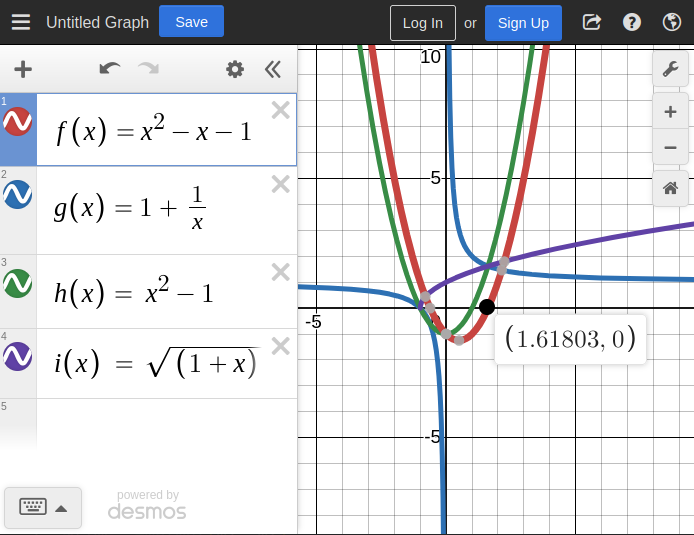


Iterations for starting point x₀ = 0.5:
  x_0 = 0.50000000
  x_1 = 3.00000000
  x_2 = 1.33333333
  x_3 = 1.75000000
  x_4 = 1.57142857
  x_5 = 1.63636364
  x_6 = 1.61111111
  x_7 = 1.62068966
  x_8 = 1.61702128
  x_9 = 1.61842105
  x_10 = 1.61788618
  x_11 = 1.61809045
  x_12 = 1.61801242
  x_13 = 1.61804223
  x_14 = 1.61803084
  x_15 = 1.61803519
  x_16 = 1.61803353
  x_17 = 1.61803416


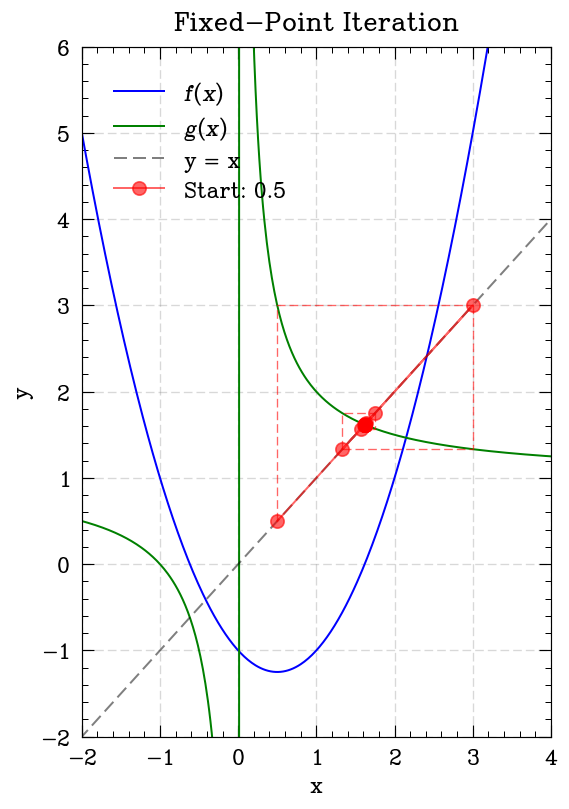


Final approximation of the root: 1.61803416


In [44]:
def f(x):
    return x**2 - x - 1

def g(x):
    return 1+(1/x)

def fixed_point_iteration(x0, tol=1e-6, max_iter=50):
    x = x0
    iterations = [x]
    for i in range(max_iter):
        x_new = g(x)
        iterations.append(x_new)
        if abs(x_new - x) < tol:
            return iterations
        x = x_new
    return iterations

# Define starting points
starting_points = [0.5]

# Create the plot
fig, ax = plt.subplots(figsize=(5,7))

x = np.linspace(-3,5,500)
ax.plot(x, f(x), 'b-', label='$f(x)$')
ax.plot(x, g(x), 'g-', label='$g(x)$')
ax.plot(x, x, 'k--', label='y = x', alpha=0.5)

colors = ['r', 'm', 'c']
for x0, color in zip(starting_points, colors):
    iterations = fixed_point_iteration(x0)

    print(f"\nIterations for starting point x₀ = {x0}:")
    for i, x in enumerate(iterations):
        print(f"  x_{i} = {x:.8f}")

    # Plot iterations
    ax.plot(iterations, iterations, f'{color}o-', alpha=0.6,
            label=f'Start: {x0}')

    for i in range(len(iterations) - 1):
        ax.plot([iterations[i], iterations[i], iterations[i+1]],
                [iterations[i], g(iterations[i]), g(iterations[i])],
                f'{color}--', linewidth=0.8, alpha=0.6)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title("Fixed-Point Iteration")
ax.legend(loc='upper left')
ax.grid(True, alpha=0.3)
ax.set_xlim(-2, 4)
ax.set_ylim(-2, 6)

plt.tight_layout()
plt.show()

# Print the final approximation of the root
print(f"\nFinal approximation of the root: {iterations[-1]:.8f}")


Iterations for starting point x₀ = -1.0:
  x_0 = -1.00000000
  x_1 = 0.00000000
  x_2 = -1.00000000
  x_3 = 0.00000000
  x_4 = -1.00000000
  x_5 = 0.00000000
  x_6 = -1.00000000
  x_7 = 0.00000000
  x_8 = -1.00000000
  x_9 = 0.00000000
  x_10 = -1.00000000
  x_11 = 0.00000000
  x_12 = -1.00000000
  x_13 = 0.00000000
  x_14 = -1.00000000
  x_15 = 0.00000000
  x_16 = -1.00000000
  x_17 = 0.00000000
  x_18 = -1.00000000
  x_19 = 0.00000000
  x_20 = -1.00000000
  x_21 = 0.00000000
  x_22 = -1.00000000
  x_23 = 0.00000000
  x_24 = -1.00000000
  x_25 = 0.00000000
  x_26 = -1.00000000
  x_27 = 0.00000000
  x_28 = -1.00000000
  x_29 = 0.00000000
  x_30 = -1.00000000
  x_31 = 0.00000000
  x_32 = -1.00000000
  x_33 = 0.00000000
  x_34 = -1.00000000
  x_35 = 0.00000000
  x_36 = -1.00000000
  x_37 = 0.00000000
  x_38 = -1.00000000
  x_39 = 0.00000000
  x_40 = -1.00000000
  x_41 = 0.00000000
  x_42 = -1.00000000
  x_43 = 0.00000000
  x_44 = -1.00000000
  x_45 = 0.00000000
  x_46 = -1.00000000
  x_

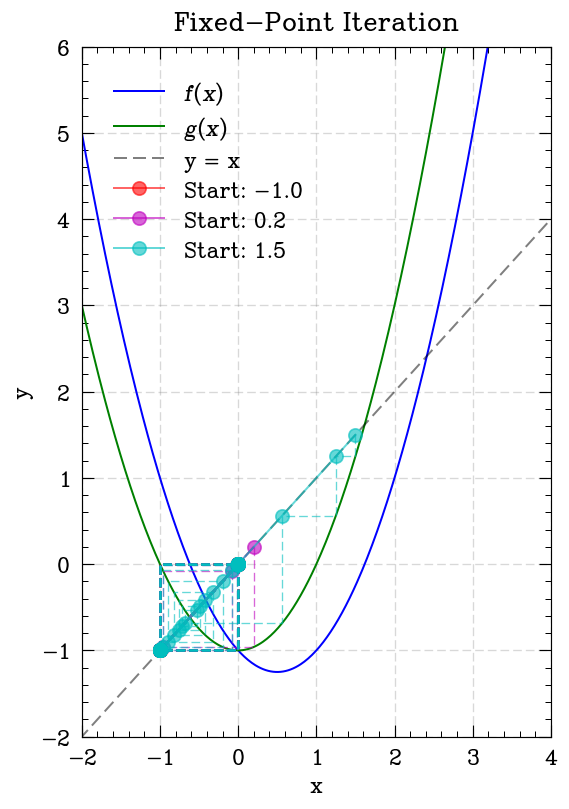


Final approximation of the root: 0.00000000


In [49]:
def f(x):
    return x**2 - x - 1

def g(x):
    return x**2-1

def fixed_point_iteration(x0, tol=1e-6, max_iter=50):
    x = x0
    iterations = [x]
    for i in range(max_iter):
        x_new = g(x)
        iterations.append(x_new)
        if abs(x_new - x) < tol:
            return iterations
        x = x_new
    return iterations

# Define starting points
starting_points = [-1.0,0.2,1.5]

# Create the plot
fig, ax = plt.subplots(figsize=(5,7))

x = np.linspace(-3,5,500)
ax.plot(x, f(x), 'b-', label='$f(x)$')
ax.plot(x, g(x), 'g-', label='$g(x)$')
ax.plot(x, x, 'k--', label='y = x', alpha=0.5)

colors = ['r', 'm', 'c']
for x0, color in zip(starting_points, colors):
    iterations = fixed_point_iteration(x0)

    print(f"\nIterations for starting point x₀ = {x0}:")
    for i, x in enumerate(iterations):
        print(f"  x_{i} = {x:.8f}")

    # Plot iterations
    ax.plot(iterations, iterations, f'{color}o-', alpha=0.6,
            label=f'Start: {x0}')

    for i in range(len(iterations) - 1):
        ax.plot([iterations[i], iterations[i], iterations[i+1]],
                [iterations[i], g(iterations[i]), g(iterations[i])],
                f'{color}--', linewidth=0.8, alpha=0.6)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title("Fixed-Point Iteration")
ax.legend(loc='upper left')
ax.grid(True, alpha=0.3)
ax.set_xlim(-2, 4)
ax.set_ylim(-2, 6)

plt.tight_layout()
plt.show()

# Print the final approximation of the root
print(f"\nFinal approximation of the root: {iterations[-1]:.8f}")

Root = 1.532088


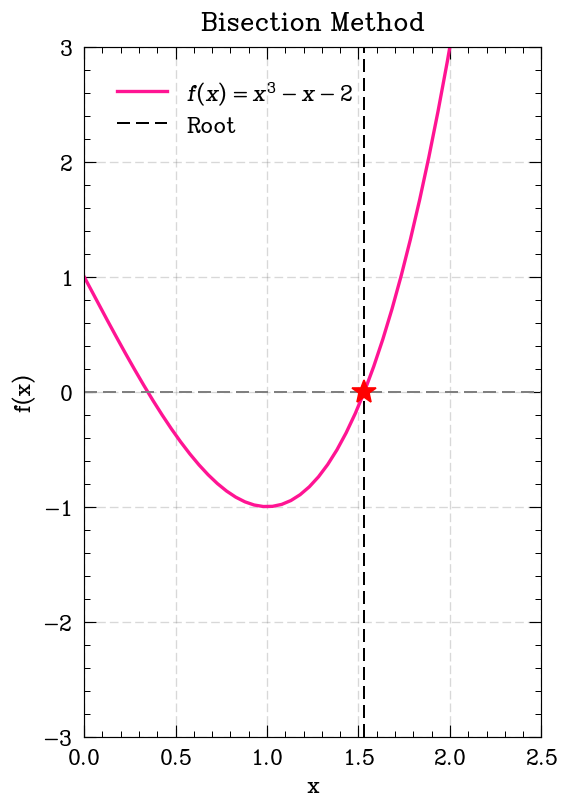

Step 1: a = 1.000000, b = 2.000000, c = 1.500000, f(c) = -0.125000
Step 2: a = 1.500000, b = 2.000000, c = 1.750000, f(c) = 1.109375
Step 3: a = 1.500000, b = 1.750000, c = 1.625000, f(c) = 0.416016
Step 4: a = 1.500000, b = 1.625000, c = 1.562500, f(c) = 0.127197
Step 5: a = 1.500000, b = 1.562500, c = 1.531250, f(c) = -0.003387
Step 6: a = 1.531250, b = 1.562500, c = 1.546875, f(c) = 0.060772
Step 7: a = 1.531250, b = 1.546875, c = 1.539062, f(c) = 0.028410
Step 8: a = 1.531250, b = 1.539062, c = 1.535156, f(c) = 0.012441
Step 9: a = 1.531250, b = 1.535156, c = 1.533203, f(c) = 0.004509
Step 10: a = 1.531250, b = 1.533203, c = 1.532227, f(c) = 0.000557
Step 11: a = 1.531250, b = 1.532227, c = 1.531738, f(c) = -0.001417
Step 12: a = 1.531738, b = 1.532227, c = 1.531982, f(c) = -0.000430
Step 13: a = 1.531982, b = 1.532227, c = 1.532104, f(c) = 0.000063
Step 14: a = 1.531982, b = 1.532104, c = 1.532043, f(c) = -0.000184
Step 15: a = 1.532043, b = 1.532104, c = 1.532074, f(c) = -0.00006

In [17]:
def f(x):
    return x**3 - 3*x + 1

def bisection(f, a, b, tol=1e-6, max_iter=100):
    if f(a) * f(b) >= 0:
        raise ValueError("Function must have opposite signs at a and b")

    steps = []
    for _ in range(max_iter):
        c = (a + b) / 2
        steps.append((a, b, c))
        if f(c) == 0 or (b - a) / 2 < tol:
            return c, steps
        if f(c) * f(a) < 0:
            b = c
        else:
            a = c
    raise ValueError("Method did not converge")

# Find the root
a, b = 1, 2
root, steps = bisection(f, a, b)
print(f"Root = {root:.6f}")

x = np.linspace(-5, 5, 200)
y = f(x)

plt.figure(figsize=(5,7))
plt.plot(x, y, label=r'$f(x) = x^{3} - x - 2$', color='deeppink', linewidth=2)
plt.axhline(y=0, color='grey', linestyle='--')
plt.axvline(x=root, color='black', linestyle='--', label='Root')
plt.plot(root, 0, 'r*', markersize=15)

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Bisection Method')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(0, 2.5)
plt.ylim(-3, 3)

plt.tight_layout()
plt.show()

# Print steps
for i, (left, right, mid) in enumerate(steps):
    print(f"Step {i+1}: a = {left:.6f}, b = {right:.6f}, c = {mid:.6f}, f(c) = {f(mid):.6f}")

Root = 1.532088


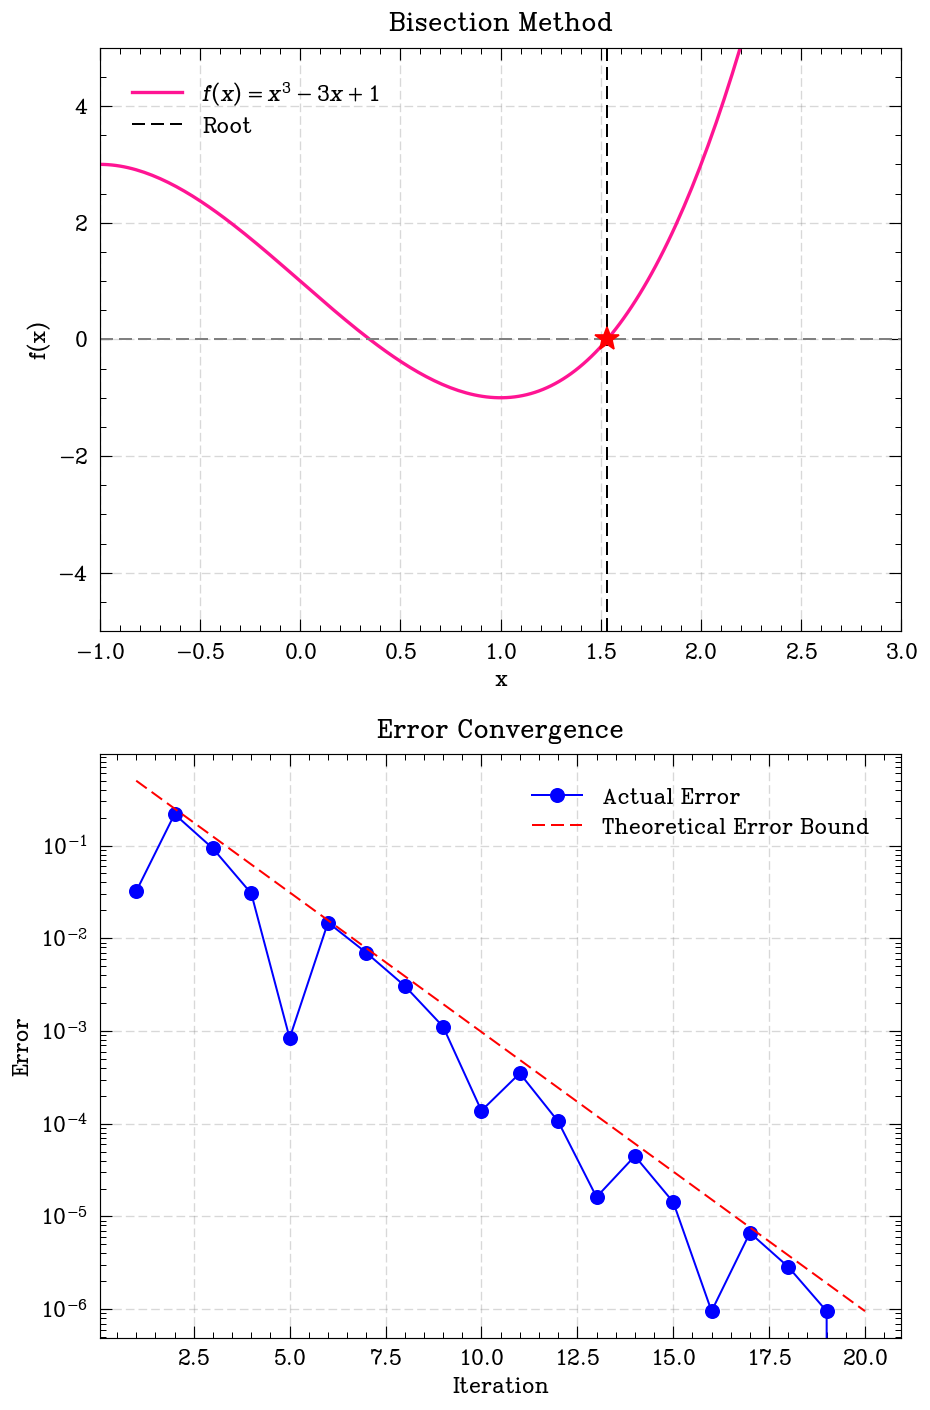


Bisection Method Steps:
Step 1: a = 1.000000, b = 2.000000, c = 1.500000, f(c) = -0.125000
Step 2: a = 1.500000, b = 2.000000, c = 1.750000, f(c) = 1.109375
Step 3: a = 1.500000, b = 1.750000, c = 1.625000, f(c) = 0.416016
Step 4: a = 1.500000, b = 1.625000, c = 1.562500, f(c) = 0.127197
Step 5: a = 1.500000, b = 1.562500, c = 1.531250, f(c) = -0.003387
Step 6: a = 1.531250, b = 1.562500, c = 1.546875, f(c) = 0.060772
Step 7: a = 1.531250, b = 1.546875, c = 1.539062, f(c) = 0.028410
Step 8: a = 1.531250, b = 1.539062, c = 1.535156, f(c) = 0.012441
Step 9: a = 1.531250, b = 1.535156, c = 1.533203, f(c) = 0.004509
Step 10: a = 1.531250, b = 1.533203, c = 1.532227, f(c) = 0.000557
Step 11: a = 1.531250, b = 1.532227, c = 1.531738, f(c) = -0.001417
Step 12: a = 1.531738, b = 1.532227, c = 1.531982, f(c) = -0.000430
Step 13: a = 1.531982, b = 1.532227, c = 1.532104, f(c) = 0.000063
Step 14: a = 1.531982, b = 1.532104, c = 1.532043, f(c) = -0.000184
Step 15: a = 1.532043, b = 1.532104, c = 

In [19]:
def f(x):
    return x**3 - 3*x + 1

def bisection(f, a, b, tol=1e-6, max_iter=100):
    if f(a) * f(b) >= 0:
        raise ValueError("Function must have opposite signs at a and b")

    steps = []
    for _ in range(max_iter):
        c = (a + b) / 2
        steps.append((a, b, c))
        if f(c) == 0 or (b - a) / 2 < tol:
            return c, steps
        if f(c) * f(a) < 0:
            b = c
        else:
            a = c
    raise ValueError("Method did not converge")

a, b = 1, 2
root, steps = bisection(f, a, b)
print(f"Root = {root:.6f}")

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 12))

# Plot the function and root
x = np.linspace(-1, 3, 200)
y = f(x)

ax1.plot(x, y, label=r'$f(x) = x^3 - 3x + 1$', color='deeppink', linewidth=2)
ax1.axhline(y=0, color='grey', linestyle='--')
ax1.axvline(x=root, color='black', linestyle='--', label='Root')
ax1.plot(root, 0, 'r*', markersize=15)

ax1.set_xlabel('x')
ax1.set_ylabel('f(x)')
ax1.set_title('Bisection Method')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_xlim(-1, 3)
ax1.set_ylim(-5, 5)

# Calculate and plot error convergence
errors = [abs(root - step[2]) for step in steps]
theoretical_error = [(b - a) / (2**i) for i in range(1, len(steps) + 1)]

ax2.semilogy(range(1, len(steps) + 1), errors, 'bo-', label='Actual Error')
ax2.semilogy(range(1, len(steps) + 1), theoretical_error, 'r--', label='Theoretical Error Bound')

ax2.set_xlabel('Iteration')
ax2.set_ylabel('Error')
ax2.set_title('Error Convergence')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print steps
print("\nBisection Method Steps:")
for i, (left, right, mid) in enumerate(steps):
    print(f"Step {i+1}: a = {left:.6f}, b = {right:.6f}, c = {mid:.6f}, f(c) = {f(mid):.6f}")

In [ ]:
import numpy as np

def f(x):
    """
    System of equations:
    f1(x, y) = x^2 + y^2 - 4
    f2(x, y) = e^x - y - 1
    """
    return np.array([
        x[0]**2 + x[1]**2 - 4,
        np.exp(x[0]) - x[1] - 1
    ])

def jacobian(x):
    """Jacobian matrix of f(x)"""
    return np.array([
        [2*x[0], 2*x[1]],
        [np.exp(x[0]), -1]
    ])

def newton_raphson_multi(f, jacobian, x0, tol=1e-6, max_iter=100):
    x = x0
    for i in range(max_iter):
        fx = f(x)
        if np.linalg.norm(fx) < tol:
            return x, i
        J = jacobian(x)
        delta = np.linalg.solve(J, -fx)
        x = x + delta
        if np.linalg.norm(delta) < tol:
            return x, i
    raise ValueError("Method did not converge")

# Initial guess
x0 = np.array([3.0, 1.0])

# Solve the system
solution, iterations = newton_raphson_multi(f, jacobian, x0)

print("Solution:", solution)
print("Iterations:", iterations)
print("Function value at solution:", f(solution))

Solution: [1.00416874 1.72963729]
Iterations: 6
Function value at solution: [3.78870268e-11 5.17104137e-11]


In [ ]:
solution[0]

1.0041687386935545

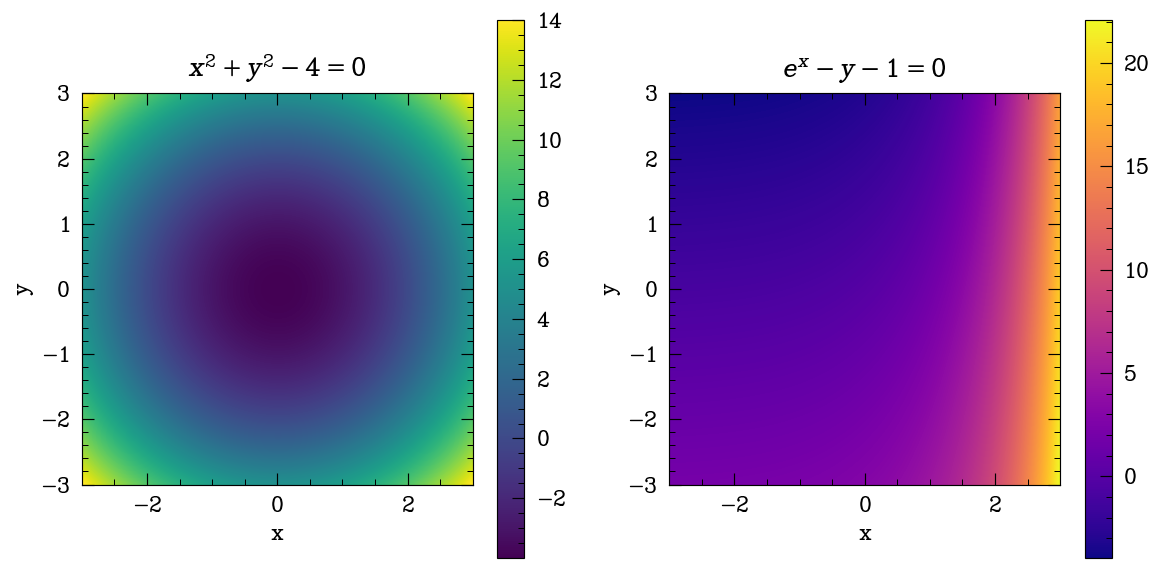

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.array([
        x[0]**2 + x[1]**2 - 4,
        np.exp(x[0]) - x[1] - 1
    ])

def visualize_system(f, x_range=(-3, 3), y_range=(-3, 3)):
    x = np.linspace(*x_range, 100)
    y = np.linspace(*y_range, 100)
    X, Y = np.meshgrid(x, y)
    Z1 = f([X, Y])[0]
    Z2 = f([X, Y])[1]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
    im1 = ax1.imshow(Z1, cmap='viridis', extent=(*x_range, *y_range), origin='lower', interpolation='bilinear')
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.set_title(r'$x^{2} + y^{2} - 4 = 0$')
    fig.colorbar(im1, ax=ax1)

    im2 = ax2.imshow(Z2, cmap='plasma', extent=(*x_range, *y_range), origin='lower', interpolation='bilinear')
    ax2.set_xlabel('x')
    ax2.set_ylabel('y')
    ax2.set_title(r'$e^{x}-y-1 = 0$')
    fig.colorbar(im2, ax=ax2)

    plt.tight_layout()
    plt.show()

visualize_system(f)

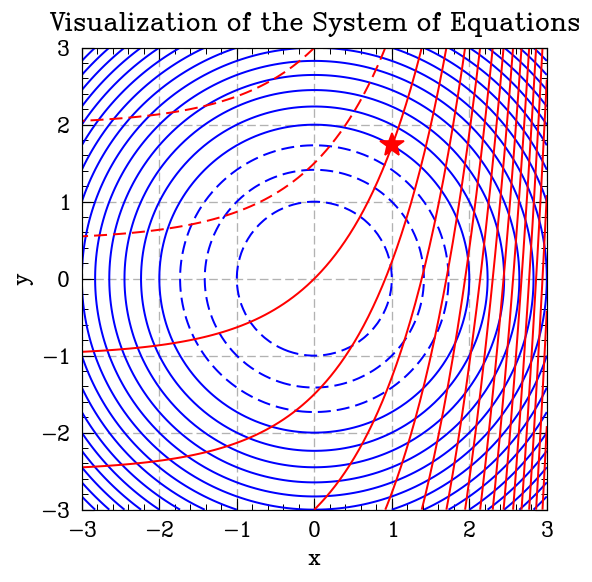

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.array([
        x[0]**2 + x[1]**2 - 4,
        np.exp(x[0]) - x[1] - 1
    ])

def visualize_system(f, x_range=(-3, 3), y_range=(-3, 3), levels=20):
    x = np.linspace(*x_range, 100)
    y = np.linspace(*y_range, 100)
    X, Y = np.meshgrid(x, y)
    Z1 = f([X, Y])[0]
    Z2 = f([X, Y])[1]

    plt.figure(figsize=(5,5))
    plt.contour(X, Y, Z1, levels=levels, colors='blue', label=r'$x^{2} + y^{2} - 4 = 0$')
    plt.contour(X, Y, Z2, levels=levels, colors='red', label=r'$e^{x}-y-1 = 0$')
    plt.plot(solution[0],solution[1], 'r*', markersize=15)

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Visualization of the System of Equations')
    plt.legend()
    plt.grid(True)
    plt.show()

visualize_system(f)

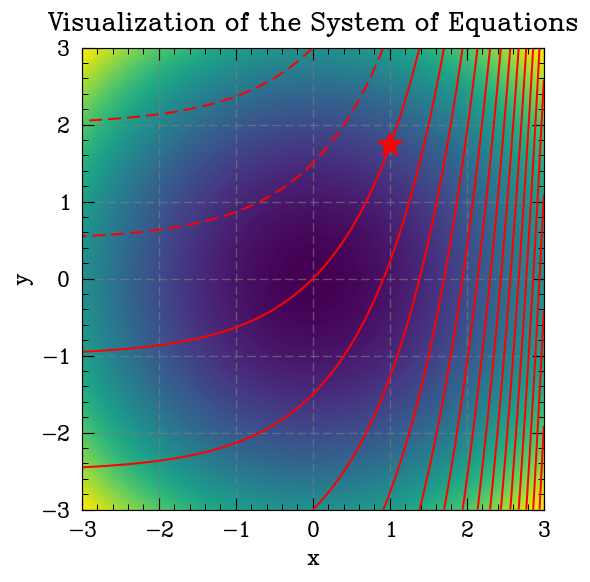

In [ ]:
def f(x):
    return np.array([
        x[0]**2 + x[1]**2 - 4,
        np.exp(x[0]) - x[1] - 1
    ])

def visualize_system(f, x_range=(-3, 3), y_range=(-3, 3)):
    x = np.linspace(*x_range, 100)
    y = np.linspace(*y_range, 100)
    X, Y = np.meshgrid(x, y)
    Z1 = f([X, Y])[0]
    Z2 = f([X, Y])[1]

    plt.figure(figsize=(5,5))
    plt.imshow(Z1, cmap='viridis', extent=(*x_range, *y_range), origin='lower', interpolation='bilinear')
    #plt.imshow(Z2, cmap='plasma', extent=(*x_range, *y_range), origin='lower', interpolation='bilinear', alpha=0.5)
    plt.contour(X, Y, Z2, levels=20, colors='red', label=r'$e^{x}-y-1 = 0$')
    plt.plot(solution[0],solution[1], 'r*', markersize=15)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Visualization of the System of Equations')
    plt.grid(True)
    plt.show()

visualize_system(f)

Root: (1.0000000089100063-2.556813290268919e-08j), Iterations: 7
Root: (-0.4999999999999555+0.8660254037846933j), Iterations: 4
Root: (-0.4999999999999555-0.8660254037846933j), Iterations: 4


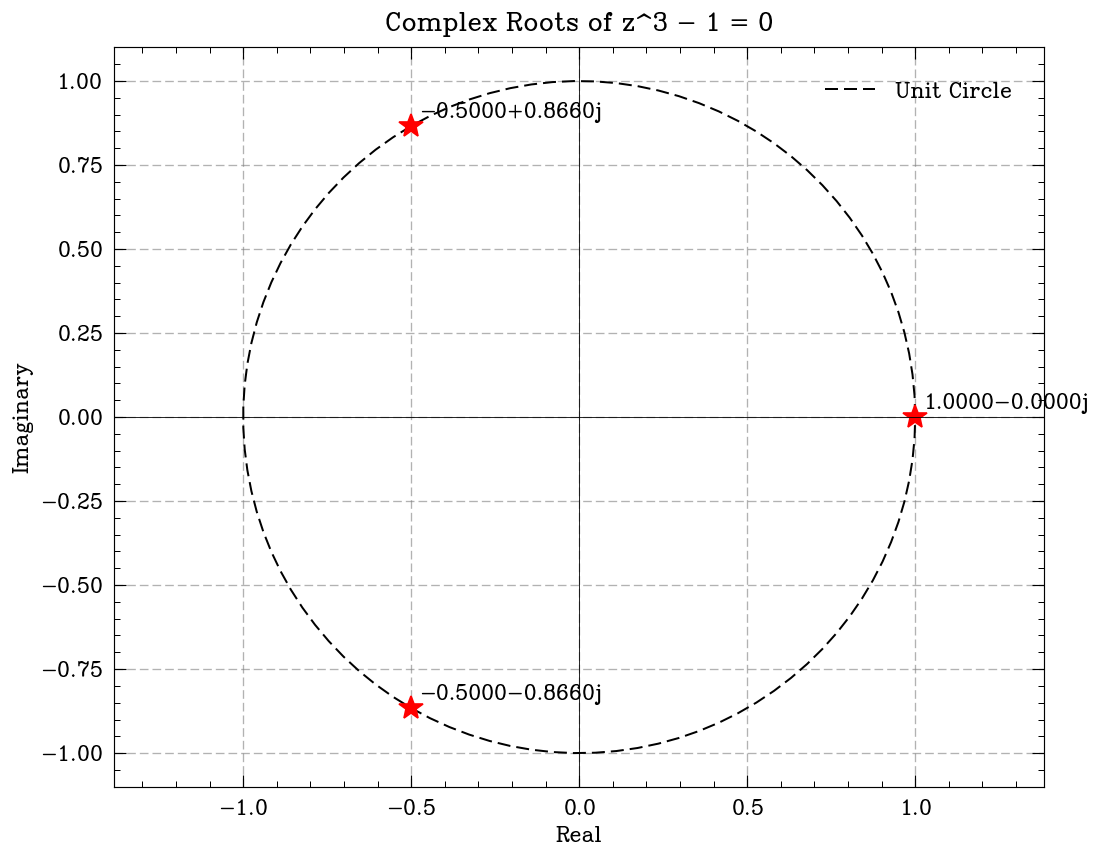

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(z):
    """Complex function: f(z) = z^3 - 1"""
    return z**3 - 1

def f_prime(z):
    """Derivative of f(z)"""
    return 3 * z**2

def newton_raphson_complex(f, f_prime, z0, tol=1e-6, max_iter=100):
    z = z0
    for i in range(max_iter):
        fz = f(z)
        if abs(fz) < tol:
            return z, i
        dfz = f_prime(z)
        if dfz == 0:
            raise ValueError("Derivative is zero")
        z = z - fz / dfz
        if abs(fz / dfz) < tol:
            return z, i
    raise ValueError("Method did not converge")

# Find all three roots of z^3 - 1 = 0
initial_guesses = [complex(1, 1), complex(-1, 1), complex(-1, -1)]
roots = []

for z0 in initial_guesses:
    root, iterations = newton_raphson_complex(f, f_prime, z0)
    roots.append(root)
    print(f"Root: {root}, Iterations: {iterations}")

# Plotting
plt.figure(figsize=(10, 8))
theta = np.linspace(0, 2*np.pi, 100)
circle = np.exp(1j * theta)
plt.plot(circle.real, circle.imag, 'k--', label='Unit Circle')

for root in roots:
    plt.plot(root.real, root.imag, 'r*', markersize=15)
    plt.annotate(f'{root:.4f}', (root.real, root.imag), xytext=(5, 5),
                 textcoords='offset points')

plt.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
plt.axvline(x=0, color='k', linestyle='-', linewidth=0.5)
plt.title("Complex Roots of z^3 - 1 = 0")
plt.xlabel("Real")
plt.ylabel("Imaginary")
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

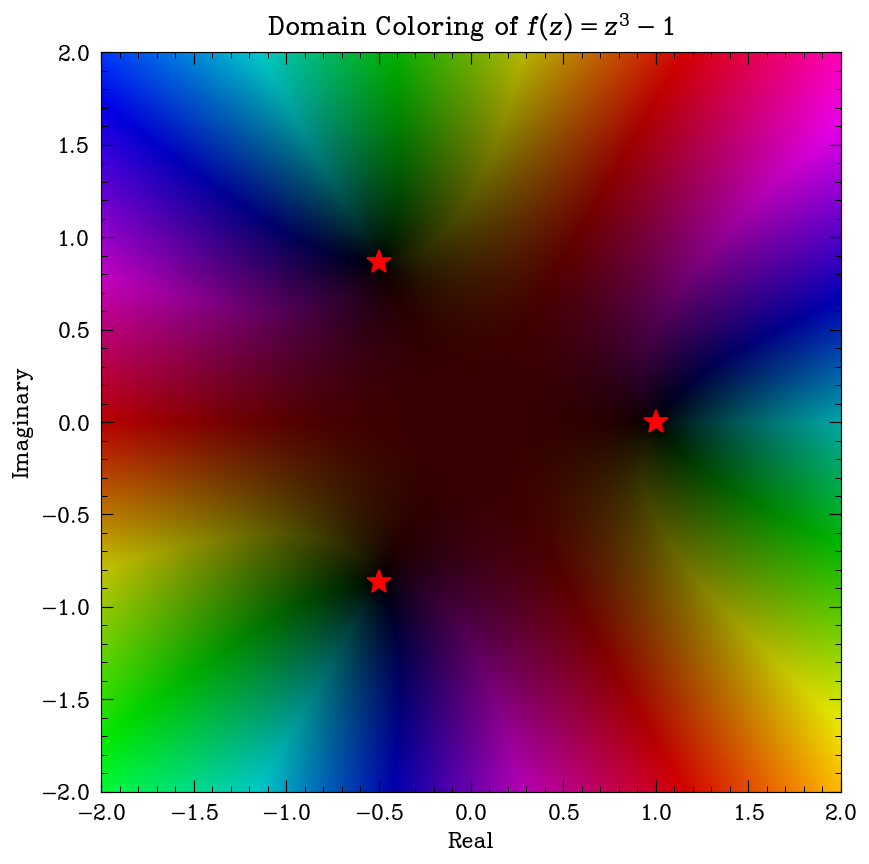

In [ ]:
def f(z):
    return z**3 - 1

def domain_coloring(f, re_range=(-2, 2), im_range=(-2, 2), resolution=500, roots=None):
    x = np.linspace(re_range[0], re_range[1], resolution)
    y = np.linspace(im_range[0], im_range[1], resolution)
    X, Y = np.meshgrid(x, y)
    Z = X + 1j * Y

    W = f(Z)

    H = (np.angle(W) + np.pi) / (2 * np.pi)
    S = np.ones_like(H)
    V = np.log(np.abs(W) + 1) / np.log(np.max(np.abs(W)) + 1)

    from matplotlib.colors import hsv_to_rgb
    RGB = hsv_to_rgb(np.dstack((H, S, V)))

    plt.figure(figsize=(8, 8))
    plt.imshow(RGB, extent=[*re_range, *im_range], origin='lower')
    plt.xlabel('Real')
    plt.ylabel('Imaginary')
    plt.title('Domain Coloring of $f(z) = z^3 - 1$')

    if roots is not None:
        for root in roots:
            plt.plot(root.real, root.imag, 'r*', markersize=15)

    plt.show()

# Example roots
roots = [1, -0.5 + 0.866j, -0.5 - 0.866j]
domain_coloring(f, roots=roots)

In [ ]:
from sympy import symbols, solve

x = symbols('x')
equation = x**3 - 3*x + 1
solutions = solve(equation, x)
print(solutions)

[-3/((-1/2 - sqrt(3)*I/2)*(27/2 + 27*sqrt(3)*I/2)**(1/3)) - (-1/2 - sqrt(3)*I/2)*(27/2 + 27*sqrt(3)*I/2)**(1/3)/3, -(-1/2 + sqrt(3)*I/2)*(27/2 + 27*sqrt(3)*I/2)**(1/3)/3 - 3/((-1/2 + sqrt(3)*I/2)*(27/2 + 27*sqrt(3)*I/2)**(1/3)), -(27/2 + 27*sqrt(3)*I/2)**(1/3)/3 - 3/(27/2 + 27*sqrt(3)*I/2)**(1/3)]


In [ ]:
from sympy import symbols, solve, pprint

x = symbols('x')
equation = x**3 - 3*x + 1
solutions = solve(equation, x)
pprint(solutions)

⎡                                                     ______________                     _________ ↪
⎢                                    ⎛  1   √3⋅ⅈ⎞    ╱ 27   27⋅√3⋅ⅈ     ⎛  1   √3⋅ⅈ⎞    ╱ 27   27⋅ ↪
⎢                                    ⎜- ─ - ────⎟⋅3 ╱  ── + ───────     ⎜- ─ + ────⎟⋅3 ╱  ── + ─── ↪
⎢                 3                  ⎝  2    2  ⎠ ╲╱   2       2        ⎝  2    2  ⎠ ╲╱   2        ↪
⎢- ─────────────────────────────── - ───────────────────────────────, - ────────────────────────── ↪
⎢                   ______________                  3                                  3           ↪
⎢  ⎛  1   √3⋅ⅈ⎞    ╱ 27   27⋅√3⋅ⅈ                                                                  ↪
⎢  ⎜- ─ - ────⎟⋅3 ╱  ── + ───────                                                                  ↪
⎣  ⎝  2    2  ⎠ ╲╱   2       2                                                                     ↪

↪ _____                                          ______________                     ⎤
↪ √3

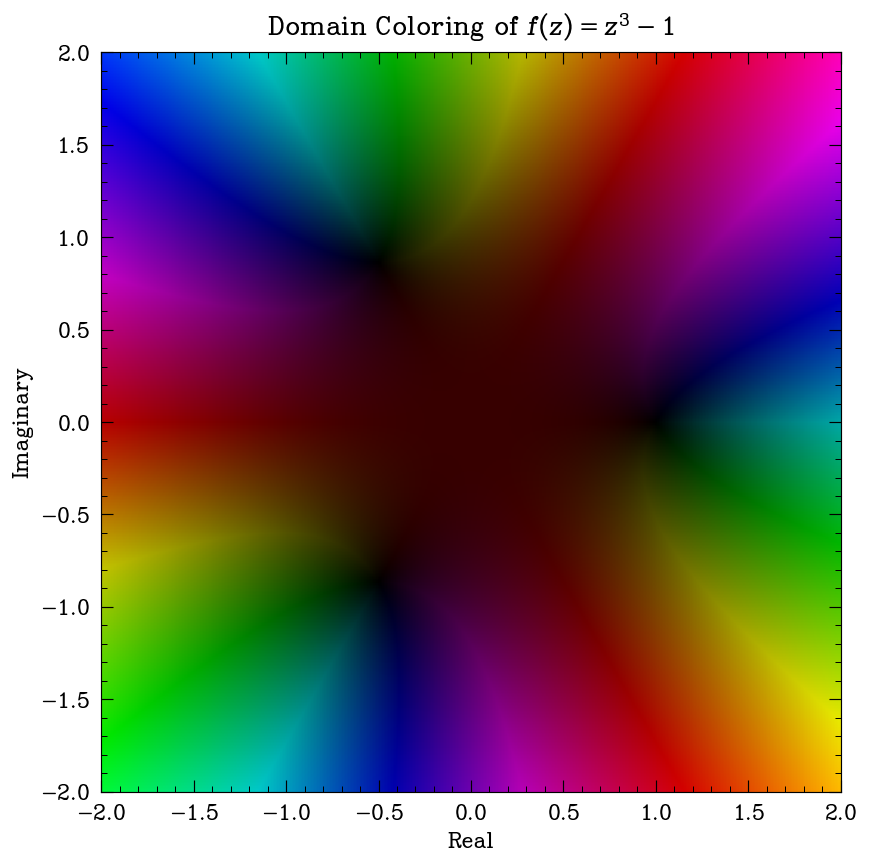

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(z):
    return z**3 - 1

def domain_coloring(f, re_range=(-2, 2), im_range=(-2, 2), resolution=500):
    x = np.linspace(re_range[0], re_range[1], resolution)
    y = np.linspace(im_range[0], im_range[1], resolution)
    X, Y = np.meshgrid(x, y)
    Z = X + 1j * Y

    W = f(Z)

    # Hue corresponds to the phase angle of the output
    H = (np.angle(W) + np.pi) / (2 * np.pi)

    # Saturation is set to 1
    S = np.ones_like(H)

    # Value corresponds to the magnitude of the output, scaled for better visualization
    V = np.log(np.abs(W) + 1) / np.log(np.max(np.abs(W)) + 1)

    # Convert HSV to RGB for matplotlib
    from matplotlib.colors import hsv_to_rgb
    RGB = hsv_to_rgb(np.dstack((H, S, V)))

    plt.figure(figsize=(8, 8))
    plt.imshow(RGB, extent=[*re_range, *im_range], origin='lower')
    plt.xlabel('Real')
    plt.ylabel('Imaginary')
    plt.title('Domain Coloring of $f(z) = z^3 - 1$')
    plt.show()

domain_coloring(f)